In [1]:
%pylab inline
%config InlineBackend.figure_format = 'svg'
import pylab as plb
plb.rcParams['pdf.fonttype'] = 42

Populating the interactive namespace from numpy and matplotlib


In [2]:
import h5py
start_db = h5py.File('../02_imaging_post_processing/start_db.hdf5','r')
stop_db = h5py.File('../02_imaging_post_processing/stop_db.hdf5','r')
trial_db = h5py.File('../02_imaging_post_processing/trial_db.hdf5')

In [3]:
set(trial_db['genotypes'])

{'+;10XUAS-EGFP/+;P{y[+t7.7] w[+mC]=GMR10A12-GAL4}attP2/+',
 '+;10XUAS-EGFP/+;P{y[+t7.7] w[+mC]=GMR22H05_GFP-GAL4}attP2/+',
 '+;10XUAS-EGFP/+;P{y[+t7.7] w[+mC]=GMR29E05-GAL4}attP2/+',
 '+;10XUAS-EGFP/+;P{y[+t7.7] w[+mC]=GMR31E10-GAL4}attP2/+',
 '+;10XUAS-EGFP/+;P{y[+t7.7] w[+mC]=GMR39E01-GAL4}attP2/+',
 '+;10XUAS-EGFP/+;P{y[+t7.7] w[+mC]=GMR74F03-GAL4}attP2/+',
 '+;10XUAS-EGFP/+;P{y[+t7.7] w[+mC]=GMR75B06-GAL4}attP2/+',
 '+;P{20XUAS-IVS-GCaMP6f}attP40/+;P{y[+t7.7] w[+mC]=GMR10A12-GAL4}attP2/+',
 '+;P{20XUAS-IVS-GCaMP6f}attP40/+;P{y[+t7.7] w[+mC]=GMR22H05-GAL4}attP2/+',
 '+;P{20XUAS-IVS-GCaMP6f}attP40/+;P{y[+t7.7] w[+mC]=GMR29E05-GAL4}attP2/+',
 '+;P{20XUAS-IVS-GCaMP6f}attP40/+;P{y[+t7.7] w[+mC]=GMR31E10-GAL4}attP2/+',
 '+;P{20XUAS-IVS-GCaMP6f}attP40/+;P{y[+t7.7] w[+mC]=GMR39E01-GAL4}attP2/+',
 '+;P{20XUAS-IVS-GCaMP6f}attP40/+;P{y[+t7.7] w[+mC]=GMR74F03-GAL4}attP2/+',
 '+;P{20XUAS-IVS-GCaMP6f}attP40/+;P{y[+t7.7] w[+mC]=GMR75B06-GAL4}attP2/+',
 '+;P{20XUAS-IVS-GCaMP6f}attP40;P{y[+t7.7] w

In [4]:
def resample_dset(trial_db,skey = None,grouping_key = None,sub_selection = None):
    sub_dataset = np.array(trial_db[skey])[sub_selection]
    sub_group = np.array(trial_db[grouping_key])[sub_selection]
    ntrials= len(sub_dataset)
    ngroups = len(set(sub_group))
    resampled_moms = list()
    for rep in range(100):
        shidx = np.random.choice(ntrials, ntrials)
        resampled_trials = sub_dataset[shidx]
        resampled_group = sub_group[shidx]
        resampled_means = group_means(resampled_trials,resampled_group)
        shidx2 = np.random.choice(len(resampled_means),ngroups)
        resampled_moms.append(np.nanmean(resampled_means[shidx2],axis = 0))
    return np.array(resampled_moms)

In [5]:
def group_means(data,groups):
    temp_list = list()
    group_items = list(set(groups))
    for group_item in group_items:
        selection = groups == group_item
        temp_list.append(np.nanmean(data[selection],axis = 0))
    return np.array(temp_list)

In [6]:
##################################
##################################
trial_selection = np.array(trial_db['trial_names']) == 'flight_starts'
genotype_selection = np.array(trial_db['genotypes']) == '+;P{20XUAS-IVS-GCaMP6f}attP40/+;P{y[+t7.7] w[+mC]=GMR22H05-GAL4}attP2/+'
two_d_sigs = [key for key,item in trial_db.items() if len(item.shape)>1]
grouping_key = 'fly_numbers'
sub_selection = trial_selection & genotype_selection

start_data_22H05 = dict()
for skey in two_d_sigs:
    resampled_moms = resample_dset(trial_db,skey = skey,
                                   grouping_key = grouping_key,
                                   sub_selection = sub_selection)
    start_data_22H05[skey] = {'ub':np.nanpercentile(resampled_moms,97.5,axis = 0),
                              'lb':np.nanpercentile(resampled_moms,2.5,axis = 0),
                               'm':np.mean(group_means(np.array(trial_db[skey])[sub_selection],
                                          np.array(trial_db[grouping_key])[sub_selection]),
                                          axis = 0)}
####    
trial_selection = np.array(trial_db['trial_names']) == 'flight_starts'
genotype_selection = np.array(trial_db['genotypes']) == '+;P{20XUAS-IVS-GCaMP6f}attP40/+;P{y[+t7.7] w[+mC]=GMR39E01-GAL4}attP2/+'
two_d_sigs = [key for key,item in trial_db.items() if len(item.shape)>1]
grouping_key = 'fly_numbers'
sub_selection = trial_selection & genotype_selection

start_data_39E01 = dict()
for skey in two_d_sigs:
    resampled_moms = resample_dset(trial_db,skey = skey,
                                   grouping_key = grouping_key,
                                   sub_selection = sub_selection)
    start_data_39E01[skey] = {'ub':np.nanpercentile(resampled_moms,97.5,axis = 0),
                              'lb':np.nanpercentile(resampled_moms,2.5,axis = 0),
                              'm':np.mean(group_means(np.array(trial_db[skey])[sub_selection],
                                          np.array(trial_db[grouping_key])[sub_selection]),
                                          axis = 0)}

##################################
##################################
trial_selection = np.array(trial_db['trial_names']) == 'flight_starts'
genotype_selection = np.array(trial_db['genotypes']) == '+;10XUAS-EGFP/+;P{y[+t7.7] w[+mC]=GMR22H05_GFP-GAL4}attP2/+'
two_d_sigs = [key for key,item in trial_db.items() if len(item.shape)>1]
grouping_key = 'fly_numbers'
sub_selection = trial_selection & genotype_selection

start_data_22H05_c = dict()
for skey in two_d_sigs:
    resampled_moms = resample_dset(trial_db,skey = skey,
                                   grouping_key = grouping_key,
                                   sub_selection = sub_selection)
    start_data_22H05_c[skey] = {'ub':np.nanpercentile(resampled_moms,97.5,axis = 0),
                              'lb':np.nanpercentile(resampled_moms,2.5,axis = 0),
                              'm':np.mean(group_means(np.array(trial_db[skey])[sub_selection],
                                          np.array(trial_db[grouping_key])[sub_selection]),
                                          axis = 0)}
####
trial_selection = np.array(trial_db['trial_names']) == 'flight_starts'
genotype_selection = np.array(trial_db['genotypes']) == '+;10XUAS-EGFP/+;P{y[+t7.7] w[+mC]=GMR39E01-GAL4}attP2/+'
two_d_sigs = [key for key,item in trial_db.items() if len(item.shape)>1]
grouping_key = 'fly_numbers'
sub_selection = trial_selection & genotype_selection

start_data_39E01_c = dict()
for skey in two_d_sigs:
    resampled_moms = resample_dset(trial_db,skey = skey,
                                   grouping_key = grouping_key,
                                   sub_selection = sub_selection)
    start_data_39E01_c[skey] = {'ub':np.nanpercentile(resampled_moms,97.5,axis = 0),
                              'lb':np.nanpercentile(resampled_moms,2.5,axis = 0),
                              'm':np.mean(group_means(np.array(trial_db[skey])[sub_selection],
                                          np.array(trial_db[grouping_key])[sub_selection]),
                                          axis = 0)}

/home/psilentp/anaconda/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/home/psilentp/anaconda/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:993: RuntimeWarning: All-NaN slice encountered
  warnings.warn("All-NaN slice encountered", RuntimeWarning)


In [3]:
import group_data as gd
from pandas import DataFrame, Series
def get_rowdf(row):
    print row
    series_dict = dict()
    for key in trial_db.keys():
        if not (key =='signal_units'):
            #print key
            xi = gd.get_xio(trial_db['trial_names'][0])
            if np.shape(trial_db[key].shape)[0] == 1:
                series_dict.update({key:Series([trial_db[key][row]]*xi.shape[0])})
            else:
                series_dict.update({key:Series(trial_db[key][row])})
    series_dict.update({'ts':xi})
    return DataFrame(series_dict)

In [4]:
nrows,ncols = trial_db['Ph0'].shape

In [ ]:
import pandas as pd
#newdf = pd.concat([get_rowdf(i) for i in range(18866)],keys = arange(18866))
newdf = pd.concat([get_rowdf(i) for i in range(nrows)],keys = arange(nrows))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64


In [6]:
ptab = newdf.pivot_table(index =['genotypes','swarm_names','trial_names','fly_numbers','trial_numbers','ts'])

In [7]:
from pandas import HDFStore

In [8]:
store = HDFStore('../../../../FlyDataC/trial_df.hdf5')

In [9]:
store['df'] = ptab

/home/psilentp/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->unicode,key->axis0] [items->None]

  if __name__ == '__main__':
/home/psilentp/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->unicode,key->block0_items] [items->None]

  if __name__ == '__main__':


In [11]:
store.close()

<class 'pandas.io.pytables.HDFStore'>
File path: ../../../../FlyDataC/trial_df.hdf5
File is CLOSED

In [ ]:
import group_data as gd
#fly = gd.swarms['GMR22H05'].flies[11]
#fly = gd.swarms['GMR22H05'].flies[8]
fly = gd.swarms['GMR22H05_pr'].flies[5]
#fly = gd.swarms['GMR22H05_pr'].flies[11]
fly.open_fly_record()
muscle_sigs = fly.get_pkl_data('nnls_fits_bk_sub_F.cpkl')
axon_sigs = fly.fly_record['experiments'].values()[0]['tiff_data']['axon_framebase']

In [ ]:
#import dask.dataframe as df
import dask.array as da
from pandas import DataFrame
from pandas import Series
#from pandas import read_hdf

In [ ]:
def convert_to_df(h5object):
    dconv = dict()
    for key,item in h5object.items():
        print item
        dconv.update({key:np.array(item)})
    return DataFrame(dconv)

In [ ]:
ptab = newdf.pivot_table(index =['trial_names','fly_numbers','trial_numbers','ts'])

In [6]:
ptab.columns

Index([u'Ph0', u'Ph1', u'Ph2', u'StimCond', u'Xpos', u'Ypos', u'b1', u'b2',
       u'b3', u'hg1', u'hg2', u'hg3', u'hg4', u'i1', u'i2', u'iii1', u'iii24',
       u'iii3', u'nm', u'pr', u'tpd', u'tpv', u'ttm', u'wb_frequency'],
      dtype='object')

In [11]:
np.shape(trial_db['genotypes'].shape)

(1,)

In [13]:
np.shape(trial_db['genotypes'].shape)[0] == 1

True

In [2]:
from pandas import HDFStore

In [3]:
store = HDFStore('../../../../FlyDataC/trial_df.hdf5')

In [4]:
ptab = store['df']

In [8]:
ptab.index.get_level_values(0).unique()

array(['+;10XUAS-EGFP/+;P{y[+t7.7] w[+mC]=GMR10A12-GAL4}attP2/+',
       '+;10XUAS-EGFP/+;P{y[+t7.7] w[+mC]=GMR22H05_GFP-GAL4}attP2/+',
       '+;10XUAS-EGFP/+;P{y[+t7.7] w[+mC]=GMR29E05-GAL4}attP2/+',
       '+;10XUAS-EGFP/+;P{y[+t7.7] w[+mC]=GMR31E10-GAL4}attP2/+',
       '+;10XUAS-EGFP/+;P{y[+t7.7] w[+mC]=GMR39E01-GAL4}attP2/+',
       '+;10XUAS-EGFP/+;P{y[+t7.7] w[+mC]=GMR74F03-GAL4}attP2/+',
       '+;10XUAS-EGFP/+;P{y[+t7.7] w[+mC]=GMR75B06-GAL4}attP2/+',
       '+;P{20XUAS-IVS-GCaMP6f}attP40/+;P{y[+t7.7] w[+mC]=GMR10A12-GAL4}attP2/+',
       '+;P{20XUAS-IVS-GCaMP6f}attP40/+;P{y[+t7.7] w[+mC]=GMR22H05-GAL4}attP2/+',
       '+;P{20XUAS-IVS-GCaMP6f}attP40/+;P{y[+t7.7] w[+mC]=GMR29E05-GAL4}attP2/+',
       '+;P{20XUAS-IVS-GCaMP6f}attP40/+;P{y[+t7.7] w[+mC]=GMR31E10-GAL4}attP2/+',
       '+;P{20XUAS-IVS-GCaMP6f}attP40/+;P{y[+t7.7] w[+mC]=GMR39E01-GAL4}attP2/+',
       '+;P{20XUAS-IVS-GCaMP6f}attP40/+;P{y[+t7.7] w[+mC]=GMR74F03-GAL4}attP2/+',
       '+;P{20XUAS-IVS-GCaMP6f}attP40/+;P{

In [34]:
stacked = ptab.loc['+;P{20XUAS-IVS-GCaMP6f}attP40/+;P{y[+t7.7] w[+mC]=GMR22H05-GAL4}attP2/+']\
            .reset_index(level = 0,drop = True)\
            .loc['flight_starts']\
            .T.stack(level = 'ts')

In [48]:
import pandas as pd
n_samples = 1000
n_sweeps = len(set(stacked.T.index.get_level_values(1)))
n_flies = len(set(stacked.T.index.get_level_values(0)))

resampled = pd.concat([stacked.sample(n= n_sweeps,replace = True,axis = 1).T\
               .groupby(level = 0)\
               .mean().T\
               .sample(n=n_flies,replace = True,axis = 1)\
               .T.groupby(level = 0).mean().mean() for x in range(n_samples)],axis =1)

ub = resampled.quantile(0.975,axis = 1)
lb = resampled.quantile(0.025,axis = 1)

In [ ]:
#plot(stacked.T.groupby(level = 0).mean().mean()['i1'],color = 'r')

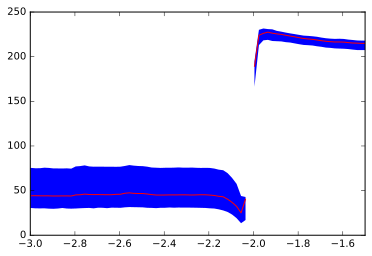

In [79]:
#plot(resampled.T.groupby(level = 0).mean().quantile(0.975))
signal = 'wb_frequency'
fill_between(ub.loc[signal].index,lb.loc[signal],ub.loc[signal],lw = 0)
plot(stacked.loc[signal].T.groupby(level = 0).mean().mean(),color = 'r')
gca().set_xbound(-3,-1.5)

In [ ]:
#Out[963].T['Ph0'].T.stack('ts').sample(n=100,replace = True).T.stack(level = 'fly_numbers')

In [ ]:
stacked.loc['Ph0'].T.sample(n= 100,replace = True,axis = 1)

In [ ]:
Out[963].T['Ph0']

In [ ]:
ptab.loc[('pth_roll_0',587,-7.00):('pth_roll_0',588,16.00)]

In [ ]:
np.array(start_db['GMR22H05']['Ph1']).ravel().shape

In [ ]:
start_db['GMR22H05']['i1'].shape[0]

In [ ]:
imshow(start_db['GMR22H05']['Ph1'],aspect = 'auto')

In [ ]:
Series(np.array(start_db['GMR22H05']['Ph1']).ravel(),
       index = np.hstack([gd.get_xio('start')]*
                         start_db['GMR22H05']['Ph1'].shape[0]))

In [ ]:
start_db['GMR22H05']['Ph1'][0]

In [ ]:
convert_to_df(start_db['GMR22H05'] )

In [ ]:
import group_data as gd
start_dict = dict()
stop_dict = dict()
xi = np.linspace(0,23,1150)
swarm_name = 'GMR22H05'
swarm_name_ctrl = 'GMR22H05_GFP'
plot_sigs = ['Ph1','wb_frequency']
plot_sigs.extend(gd.muscle_plot_list)
#endidx = 22900

#muscle_list = ['wb_frequency','b1','b2','b3','i1','i2','iii1','iii24','iii3','hg1','hg2','hg3','hg4','tpd','tpv','ttm','pr']
for plot_sig in plot_sigs:
    start_dict[plot_sig] = dict()
    start_dict[plot_sig]['md'] = np.nanpercentile(np.array(start_db[swarm_name][plot_sig]),50,axis = 0)    
    start_dict[plot_sig]['ub'] = np.nanpercentile(np.array(start_db[swarm_name][plot_sig]),75,axis = 0)
    start_dict[plot_sig]['lb'] = np.nanpercentile(np.array(start_db[swarm_name][plot_sig]),25,axis = 0)
    start_dict[plot_sig]['md_GFP'] = np.nanpercentile(np.array(start_db[swarm_name_ctrl][plot_sig]),50,axis = 0)    
    start_dict[plot_sig]['ub_GFP'] = np.nanpercentile(np.array(start_db[swarm_name_ctrl][plot_sig]),75,axis = 0)
    start_dict[plot_sig]['lb_GFP'] = np.nanpercentile(np.array(start_db[swarm_name_ctrl][plot_sig]),25,axis = 0)
    
    stop_dict[plot_sig] = dict()
    stop_dict[plot_sig]['md'] = np.nanpercentile(np.array(stop_db[swarm_name][plot_sig]),50,axis = 0)
    stop_dict[plot_sig]['ub'] = np.nanpercentile(np.array(stop_db[swarm_name][plot_sig]),75,axis = 0)
    stop_dict[plot_sig]['lb'] = np.nanpercentile(np.array(stop_db[swarm_name][plot_sig]),25,axis = 0)
    stop_dict[plot_sig]['md_GFP'] = np.nanpercentile(np.array(stop_db[swarm_name_ctrl][plot_sig]),50,axis = 0)    
    stop_dict[plot_sig]['ub_GFP'] = np.nanpercentile(np.array(stop_db[swarm_name_ctrl][plot_sig]),75,axis = 0)
    stop_dict[plot_sig]['lb_GFP'] = np.nanpercentile(np.array(stop_db[swarm_name_ctrl][plot_sig]),25,axis = 0)
    
    

In [ ]:
lookup_ybound = {'Ph1':(-90,90),
                 'Ph0':(-90,90),
                 'wb_frequency':(0,250),
                 'b1':(0.0,1.0),
                 'b2':(0.0,1.0),
                 'b3':(0.0,1.0),
                 'i1':(0.0,1.5),
                 'i2':(0.0,1.5),
                 'iii1':(0.0,4.0),
                 'iii3':(0.0,4.0),
                 'iii24':(0.0,4.0),
                 'hg1':(0.0,10.0),
                 'hg2':(0.0,10.0),
                 'hg3':(0.0,1.0),
                 'hg4':(0.0,1.0),
                 'tpd':(0.0,1.0),
                 'tpv':(0.0,1.0),
                 'ttm':(0.0,1.0),
                 'pr':(0.0,1.0)}

In [ ]:
figure(figsize = (8,10))
gs = GridSpec(len(plot_sigs)+1,8+2)
fill_kwargs = {'alpha':0.3,'clip_on':False,'lw':0,'color':'k'}
fill_kwargs_GFP = {'alpha':0.3,'clip_on':False,'lw':0,'color':'g'}
xidx = [x for x in range(1,len(plot_sigs))]
rng = (xi>4) & (xi<7)

#endidx = 78200
endidx = 22900
scale = 2500

expanded_fraction = 0.60
expanded_samples = int(scale*expanded_fraction)
expanded_region = 200+(scale-expanded_samples)/2
expanded_region = [expanded_region, expanded_region+expanded_samples]


def add_right_scale(signal):
    gca().set_ybound(lookup_ybound[signal])
    plb.gca().spines['right'].set_visible(True)
    plb.gca().spines['right'].set_bounds(*lookup_ybound[signal])
    plb.gca().spines['right'].set_position(('outward', 10))
    [y.set_visible(True) for y in plb.gca().get_yticklines()[1::2]]
    [y.set_visible(True) for y in plb.gca().get_yticklabels()]
    plb.gca().yaxis.tick_right()
    plb.gca().get_yaxis().set_tick_params(direction='out')
    plb.yticks(lookup_ybound[signal])
    
#scale = 4000
#print 'here'
#figure(figsize = figsize)

###################################
## Plot example trace x-pos
###################################

subplot(gs[0,0:7])
plotsig = np.array(axon_sigs['Xpos'])
plotsig[np.array(axon_sigs['wb_frequency'])<150.0] = -90
plot(plotsig[200:200+scale],color = 'k');kill_spines()
gca().set_ybound(0,np.max(plotsig))
#print gca().get_ybound()

###################################
## Plot example trace - frequency
###################################


subplot(gs[0+1,0:7])
#create the expanded inset
plotsig = axon_sigs['wb_frequency']
plotsig_masked = np.array(axon_sigs['wb_frequency']).copy()
plotsig_masked[expanded_region[0]:expanded_region[1]] = np.nan
#plot the non-inset data
plot(plotsig_masked[200:200+scale],color = 'k');kill_spines()
#plot the inset data
plot(np.arange(expanded_region[0],expanded_region[1])-200,
                     plotsig[expanded_region[0]:expanded_region[1]]*5 - 
                     np.min(plotsig[expanded_region[0]:expanded_region[1]]*5),color = 'k',clip_on = False)

#plot a scale bar for the non-inset data
#plot([0,0], [0,200],color = 'k')
#plot a scale bar for the inset data
#plot([expanded_region[0]-200,expanded_region[0]-200],[0,50*4],color = 'k')

#gca().set_ybound(0,np.max(axon_sigs['wb_frequency']))
gca().set_ylabel('freq',labelpad=15)
gca().set_ybound(lookup_ybound['wb_frequency'])


###################################
## Plot example trace - amplitude 
###################################

subplot(gs[1+1,0:7])
plotsig = rad2deg(np.array(axon_sigs['Ph1'])/5.0)
#set amp where fly isn't flying to zero
plotsig[np.array(axon_sigs['wb_frequency'])<150.0] = -90
#create the expanded inset
plotsig_masked = plotsig.copy()
plotsig_masked[expanded_region[0]:expanded_region[1]] = np.nan
plot(plotsig_masked[200:200+scale],color = 'k');kill_spines()
plot(np.arange(expanded_region[0],expanded_region[1])-200,
                     plotsig[expanded_region[0]:expanded_region[1]]*5 - 
                     np.min(plotsig[expanded_region[0]:expanded_region[1]]*5) - 90,color = 'k',clip_on = False)


#print gca().get_ybound()

#plot a scale bar for the non-inset data
#plot([0,0], [-90,0],color = 'k')
#plot a scale bar for the inset data
#plot([expanded_region[0]-200,expanded_region[0]-200],[-10*4,0],color = 'k')

#gca().set_ybound(-90,np.max(plotsig))
gca().set_ylabel('amp',labelpad=15)
gca().set_ybound(lookup_ybound['Ph1'])

###################################
## Plot example trace - muscle sigs
###################################

for i,sig_key in enumerate(plot_sigs[2:]):
    subplot(gs[i+2+1,0:7])

    idx = find(np.array(muscle_sigs['muscles']) == sig_key)[0]
    sig = np.array(muscle_sigs['fits'][idx])

    plot(sig[200:200+scale],color = 'k')
    
    kill_spines()
    gca().set_ylabel(plot_sigs[i+2],labelpad=15)
    gca().set_ybound(lookup_ybound[sig_key])
    #gca().set_ybound(0,max(sig))
    
###################################
## Plot example trace - termination frequency
###################################

subplot(gs[0+1,7:8])
plot(axon_sigs['wb_frequency'][endidx-(scale/8):endidx],color = 'k');kill_spines()
#gca().set_ybound(0,np.max(axon_sigs['wb_frequency']))
gca().set_ybound(lookup_ybound['wb_frequency'])
    
###################################
## Plot example trace - termination amplitude
###################################

subplot(gs[1+1,7:8])
plotsig = rad2deg(np.array(axon_sigs['Ph1'])/5.0)
plotsig[np.array(axon_sigs['wb_frequency'])<150.0] = -90
plot(plotsig[endidx-(scale/8):endidx],color = 'k');kill_spines()
gca().set_ybound(lookup_ybound['Ph1'])
#gca().set_ybound(-90,np.max(plotsig))
#print gca().get_ybound()
#print np.array(gca().get_xbound())*xi[1]


##################################
## Plot example trace - termination muscle signals
###################################

for i,sig_key in enumerate(plot_sigs[2:]):
    subplot(gs[i+2+1,7:8])

    idx = find(np.array(muscle_sigs['muscles']) == sig_key)[0]
    sig = np.array(muscle_sigs['fits'][idx])

    plot(sig[endidx-(scale/8):endidx],color = 'k')
    gca().set_ybound(lookup_ybound[sig_key])
    kill_spines()

##################################
## Plot summary data  - frequency start
###################################

subplot(gs[0+1,0+8],alpha= 0.0)

ub = np.array(start_dict['wb_frequency']['ub'])
lb = np.array(start_dict['wb_frequency']['lb'])
md = np.array(start_dict['wb_frequency']['md'])

fill_between(xi[rng],ub[rng],lb[rng],**fill_kwargs)
plot(xi[rng],md[rng],color = 'k')

#ctrls
ub = np.array(start_dict['wb_frequency']['ub_GFP'])
lb = np.array(start_dict['wb_frequency']['lb_GFP'])
md = np.array(start_dict['wb_frequency']['md_GFP'])

fill_between(xi[rng],ub[rng],lb[rng],**fill_kwargs_GFP)
plot(xi[rng],md[rng],color = 'g')

#scalebar_x = [4,4]
#plot(scalebar_x,[0,deg2rad(20.0)*5.0],clip_on = False,color = 'k')

kill_spines()

gca().set_xbound(4,7)
gca().set_ybound(lookup_ybound['wb_frequency'])
#gca().set_ybound(0,max(hstack((start_dict[plot_sigs[0]]['ub'],
#                               start_dict[plot_sigs[0]]['ub_GFP'],
#                               stop_dict[plot_sigs[0]]['ub'],
#                               stop_dict[plot_sigs[0]]['ub_GFP'])
#                             )))


##################################
## Plot summary data  - amplitude start
###################################

subplot(gs[1+1,0+8],alpha= 0.0)

ub = rad2deg(np.array(start_dict['Ph1']['ub'])/5.0)
lb = rad2deg(np.array(start_dict['Ph1']['lb'])/5.0)
md = rad2deg(np.array(start_dict['Ph1']['md'])/5.0)

mask = (start_dict['wb_frequency']['ub']<50)

ub[mask] = -90.0
lb[mask] = -90.0
md[mask] = -90.0

fill_between(xi[rng],ub[rng],lb[rng],**fill_kwargs)
plot(xi[rng],md[rng],color = 'k')

#ctrls
ub = rad2deg(np.array(start_dict['Ph1']['ub_GFP'])/5.0)
lb = rad2deg(np.array(start_dict['Ph1']['lb_GFP'])/5.0)
md = rad2deg(np.array(start_dict['Ph1']['md_GFP'])/5.0)

mask = (start_dict['wb_frequency']['ub_GFP']<50)

ub[mask] = -90.0
lb[mask] = -90.0
md[mask] = -90.0

fill_between(xi[rng],ub[rng],lb[rng],**fill_kwargs_GFP)
plot(xi[rng],md[rng],color = 'g')

#scalebar_x = [4,4]
#plot(scalebar_x,[0,deg2rad(20.0)*5.0],clip_on = False,color = 'k')

kill_spines()

gca().set_xbound(4,7)
gca().set_ybound(lookup_ybound['Ph1'])
#gca().set_ybound(0,max(hstack((start_dict[plot_sigs[0]]['ub'],
#                               start_dict[plot_sigs[0]]['ub_GFP'],
#                               stop_dict[plot_sigs[0]]['ub'],
#                               stop_dict[plot_sigs[0]]['ub_GFP'])
#                             )))



##################################
## Plot summary data muscle sigs - flight initiation
###################################

for i,row in enumerate(xidx[1:]):
    subplot(gs[i+1+2,0+8])
    signal = plot_sigs[i+2]
    fill_between(xi[rng],start_dict[signal]['ub'][rng],start_dict[signal]['lb'][rng],**fill_kwargs)
    plot(xi[rng],start_dict[signal]['md'][rng],color = 'k',clip_on = False)
    
    fill_between(xi[rng],start_dict[signal]['ub_GFP'][rng],start_dict[signal]['lb_GFP'][rng],**fill_kwargs_GFP)
    plot(xi[rng],start_dict[signal]['md_GFP'][rng],color = 'g',clip_on = False)
    kill_spines()

    
    #scalebar_x = [4,4]
    #if signal in ['tpd','tpv','ttm']:
    #    plot(scalebar_x,[0,0.1],clip_on = False, color = 'k')
    #elif signal in ['Ph0','Ph1','wb_frequency']:
    #    plot(scalebar_x,[0,100.0],clip_on = False, color = 'k')
    #else:
    #    plot(scalebar_x,[0,0.8],clip_on = False,color = 'k')
                    
    gca().set_xbound(4,7)
    
    gca().set_ybound(lookup_ybound[signal])
    #gca().set_ybound(0,max(hstack((start_dict[plot_sigs[i+1]]['ub_GFP'],
    #                               start_dict[plot_sigs[i+1]]['ub'],
    #                               stop_dict[plot_sigs[i+1]]['ub_GFP'],
    #                               stop_dict[plot_sigs[i+1]]['ub']))   ))

##################################
## Plot summary data  - frequency stop
###################################

subplot(gs[0+1,1+8],alpha= 0.0)

ub = np.array(stop_dict['wb_frequency']['ub'])
lb = np.array(stop_dict['wb_frequency']['lb'])
md = np.array(stop_dict['wb_frequency']['md'])

fill_between(xi[rng],ub[rng],lb[rng],**fill_kwargs)
plot(xi[rng],md[rng],color = 'k')

#ctrls
ub = np.array(stop_dict['wb_frequency']['ub_GFP'])
lb = np.array(stop_dict['wb_frequency']['lb_GFP'])
md = np.array(stop_dict['wb_frequency']['md_GFP'])

fill_between(xi[rng],ub[rng],lb[rng],**fill_kwargs_GFP)
plot(xi[rng],md[rng],color = 'g')

#scalebar_x = [4,4]
#plot(scalebar_x,[0,deg2rad(20.0)*5.0],clip_on = False,color = 'k')

kill_spines()

gca().set_xbound(4,7)
gca().set_ybound(lookup_ybound['wb_frequency'])
add_right_scale('wb_frequency')


##################################
## Plot summary data  - amplitude stop
###################################

subplot(gs[1+1,1+8])

ub = rad2deg(np.array(stop_dict['Ph1']['ub']/5.0))
lb = rad2deg(np.array(stop_dict['Ph1']['lb']/5.0))
md = rad2deg(np.array(stop_dict['Ph1']['md']/5.0))

mask = (stop_dict['wb_frequency']['ub']<50)

ub[mask] = -90.0
lb[mask] = -90.0
md[mask] = -90.0

fill_between(xi[rng],ub[rng],lb[rng],**fill_kwargs)
plot(xi[rng],md[rng],color = 'k')
kill_spines(top = True,bottom =True, left = True,right=True)

#ctrls
ub = rad2deg(np.array(stop_dict['Ph1']['ub_GFP']/5.0))
lb = rad2deg(np.array(stop_dict['Ph1']['lb_GFP']/5.0))
md = rad2deg(np.array(stop_dict['Ph1']['md_GFP']/5.0))

mask = (stop_dict['wb_frequency']['ub_GFP']<50)

ub[mask] = -90.0
lb[mask] = -90.0
md[mask] = -90.0

fill_between(xi[rng],ub[rng],lb[rng],**fill_kwargs_GFP)
plot(xi[rng],md[rng],color = 'g')

kill_spines()

gca().set_xbound(4,7)
gca().set_ybound(lookup_ybound['Ph1'])
add_right_scale('Ph1')
#gca().set_ybound(0,max(hstack((start_dict[plot_sigs[0]]['ub'],
#                               start_dict[plot_sigs[0]]['ub_GFP'],
#                               stop_dict[plot_sigs[0]]['ub'],
#                               stop_dict[plot_sigs[0]]['ub_GFP'])
#                             )))

##################################
## Plot summary data amplitude and muscle sigs - flight termination
###################################

for i,row in enumerate(xidx[1:]):
    signal = plot_sigs[i+2]#;print signal
    subplot(gs[i+1+2,1+8])
    fill_between(xi[rng],stop_dict[signal]['ub'][rng],stop_dict[signal]['lb'][rng],**fill_kwargs)
    plot(xi[rng],stop_dict[signal]['md'][rng],color = 'k',clip_on = False)
    fill_between(xi[rng],stop_dict[signal]['ub_GFP'][rng],stop_dict[signal]['lb_GFP'][rng],**fill_kwargs_GFP)
    plot(xi[rng],stop_dict[signal]['md_GFP'][rng],color = 'g',clip_on = False)
    
    
    kill_spines(top = True,bottom =True, left = True,right=True)
    gca().set_xbound(4,7)
    
    add_right_scale(signal)
    #gca().set_ybound(0,max(hstack((start_dict[plot_sigs[i+1]]['ub_GFP'],
    #                               start_dict[plot_sigs[i+1]]['ub'],
    #                               stop_dict[plot_sigs[i+1]]['ub_GFP'],
    #                               stop_dict[plot_sigs[i+1]]['ub']))   ))
plb.subplots_adjust( hspace=1.0 )
#print gca().get_xbound()
savefig('figure_2.pdf')

In [ ]:
import flylib as flb
hists = list()
#fly = gd.swarms['GMR22H05_pr'].flies[11]
for fly in gd.swarms['GMR22H05_pr'].flies:
    fly.open_fly_record()
    bins = np.arange(0,2*pi,2*pi/96.0)
    axon_sigs = fly.fly_record['experiments'].values()[0]['tiff_data']['axon_framebase'] 
    stripesig = np.array(axon_sigs['Xpos'])
    stripesig -= min(stripesig)
    stripesig /= max(stripesig)
    stripesig *= 2*pi
    idx = flb.idx_by_thresh(around(np.array(axon_sigs['StimCond']))<0,0.5)[0]
    idx = argwhere(np.array(axon_sigs['wb_frequency'])[idx]>150.0)
    h = histogram(stripesig[idx],bins = bins,normed = True)[0]
    h[0] = h[-1]
    h = hstack((h,h[0]))
    hists.append(h)

In [ ]:
subplot(1,1,1,polar = True)
plot(bins,hists[8])

In [ ]:
subplot(1,1,1,polar = True)
plot(bins,np.mean(hists,axis = 0))
ub = np.mean(hists,axis = 0)+np.std(hists,axis = 0)
lb = np.mean(hists,axis = 0)-np.std(hists,axis = 0)
fill_between(bins,ub,lb,lw = 0)
plot(bins,np.mean(hists,axis = 0))
savefig('spos_group.pdf')

In [ ]:
shape(hists)

In [ ]:
idx = find(np.array(muscle_sigs['muscles']) == 'b1')[0]
sig = np.array(muscle_sigs['fits'][idx])

In [ ]:
testsig = sig[0:1000]
plot(testsig)

In [ ]:
import pyfnnd

In [ ]:
n_best, c_best, LL, theta_best = pyfnnd.deconvolve(testsig,dt = 0.021,verbosity=1,learn_theta=(None, None, None, None, None),
    spikes_tol=1E-6, params_tol=1E-6,rate = 500,tau = 2.0)

In [ ]:
from scipy.signal import find_peaks_cwt
idxs = find_peaks_cwt(n_best,np.arange(1,2))

In [ ]:
subplot(2,1,1)
plot(testsig[:1000])
subplot(2,1,2)
plot(n_best[:1000])
plot(idxs[:100],n_best[idxs[:100]],'o')